In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from pylab import rcParams
import statsmodels.api as sm

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale 
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [2]:
data= pd.read_csv('Folds-one sheet.csv')
num_rows= data.shape[0]
print ('Number of rows=', num_rows)

Number of rows= 47840


# Data & Preprocessing  
## Remove Null Data

In [3]:
counter_nan= data.isnull().sum()
counter_without_nan= counter_nan[counter_nan==0]
data= data[counter_without_nan.keys()]

## Name Columns 

In [4]:
data.columns= ['Avg_Temp', 'Vacuum', 'Avg_Pressure', 'Humidity', 'Output']
data.head()

,Avg_Temp,Vacuum,Avg_Pressure,Humidity,Output
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


# Visualization

In [5]:
data.describe()

,Avg_Temp,Vacuum,Avg_Pressure,Humidity,Output
count,47840.000000,47840.000000,47840.000000,47840.000000,47840.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452162,12.707362,5.938535,14.599658,17.066281
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


C:\Users\NAFIS\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


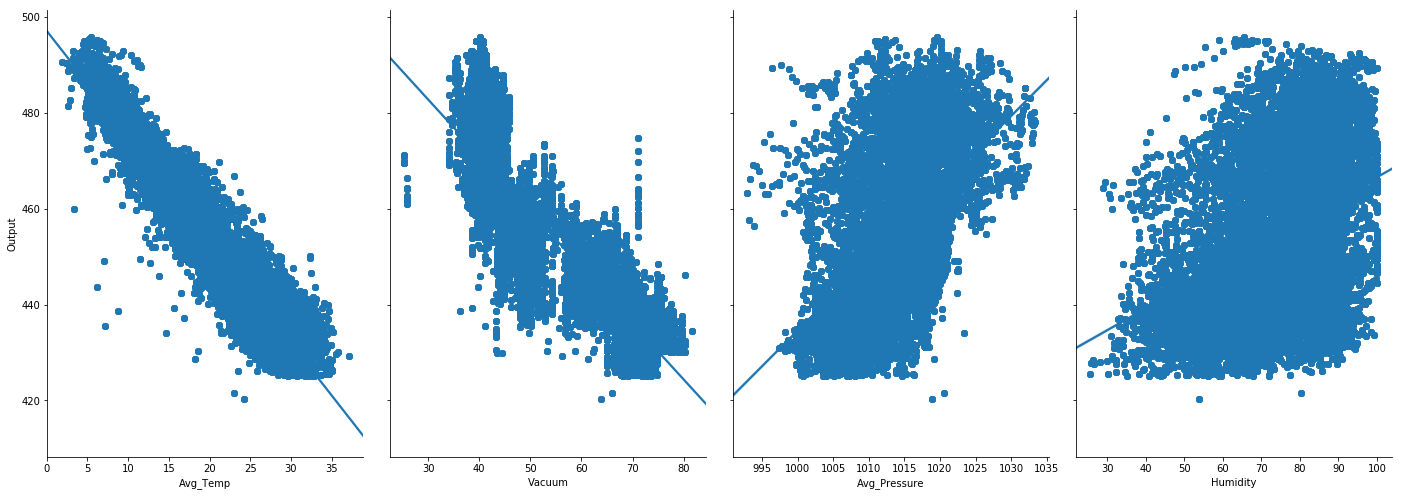

In [6]:
 sb.pairplot(data, x_vars=['Avg_Temp', 'Vacuum', 'Avg_Pressure', 'Humidity'], y_vars='Output',height=7, aspect=0.7, kind='reg')

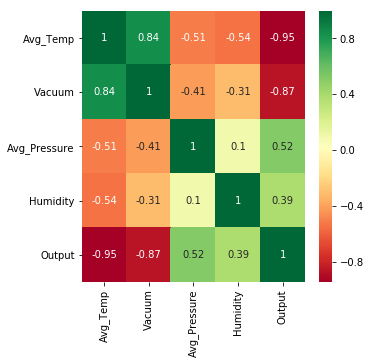

In [7]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(5,5))
g=sb.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Method Implementation (Multivariable Linear Regression)
## Feature Select and Train/Test Split

In [8]:
X = data[['Avg_Temp', 'Vacuum']].values
y = data['Output'].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit Model

In [26]:
reg = LinearRegression()  
reg.fit(X_train, y_train)
print ("The intercept, 1st coefficient & 2nd coefficient are as follows")
print (reg.intercept_)
print (reg.coef_[0])
print (reg.coef_[1])


The intercept, 1st coefficient & 2nd coefficient are as follows
505.5553602252643
-1.7045879238058852
-0.3256890784641872


# Results

In [11]:
y_pred = reg.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.884249854471419
Mean Squared Error: 24.124802502223126
Root Mean Squared Error: 4.911700571311644


In [12]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                 2.599e+05
Date:                Wed, 31 Jul 2019   Prob (F-statistic):               0.00
Time:                        01:04:57   Log-Likelihood:            -1.4444e+05
No. Observations:               47840   AIC:                         2.889e+05
Df Residuals:                   47837   BIC:                         2.889e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        505.4774      0.108   4700.480      0.0